In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [3]:
quandl.ApiConfig.api_key = 'Zj-Uzb17QA-yYhzNyjFv'

In [4]:
#data path
path= r"C:\Users\galia\OneDrive\Escritorio\DA course\6.1\Data"

In [5]:
#import data
df=pd.read_csv(os.path.join(path,"df_boat_ex.csv"))

In [6]:
df.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,value_in_eur,country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,3367.0,Denmark
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany
4,4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600.0,Switzerland


### Create a line chart of your data.

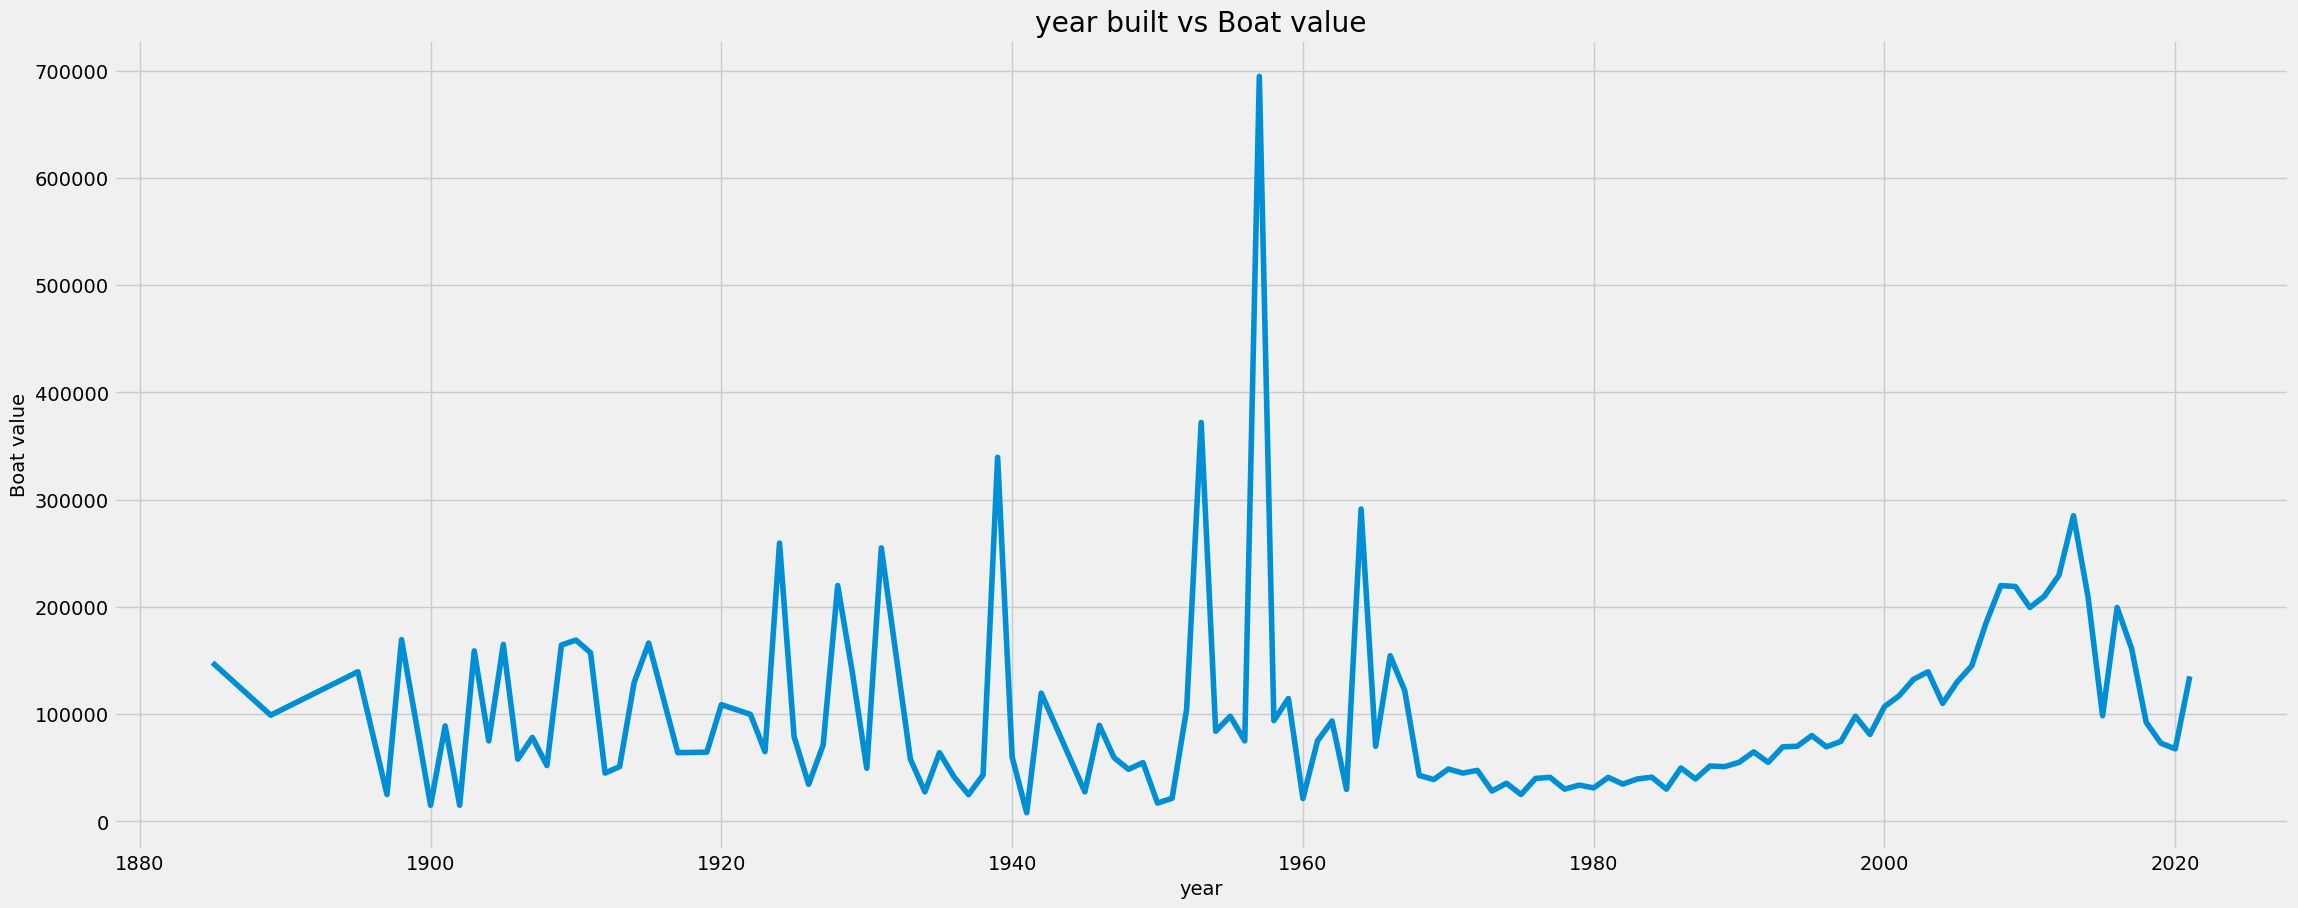

In [7]:
#grouping data
df_year=df.groupby("year_built").agg({"value_in_eur":["median"]})

plt.figure(figsize=(25,10), dpi=100)
plt.title("year built vs Boat value" )
plt.xlabel("year")
plt.ylabel("Boat value")
plt.plot(df_year)

In [8]:
# Check for missing values (you shouldn't have any)

df_year.isnull().sum() 

value_in_eur  median    0
dtype: int64

In [9]:
# Check for duplicates

dups = df_year.duplicated()
dups.sum()

# No dups!

14

In [10]:
dups

year_built
1885    False
1889    False
1895    False
1897    False
1898    False
        ...  
2017    False
2018    False
2019    False
2020    False
2021    False
Length: 121, dtype: bool

### Decompose the data’s components.
#### Analyze the results from the plot in a markdown cell.


In [11]:
df_year.index.freq = 'M'

In [12]:
decomposition = sm.tsa.seasonal_decompose(df_year, model='additive', period=12)

In [13]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

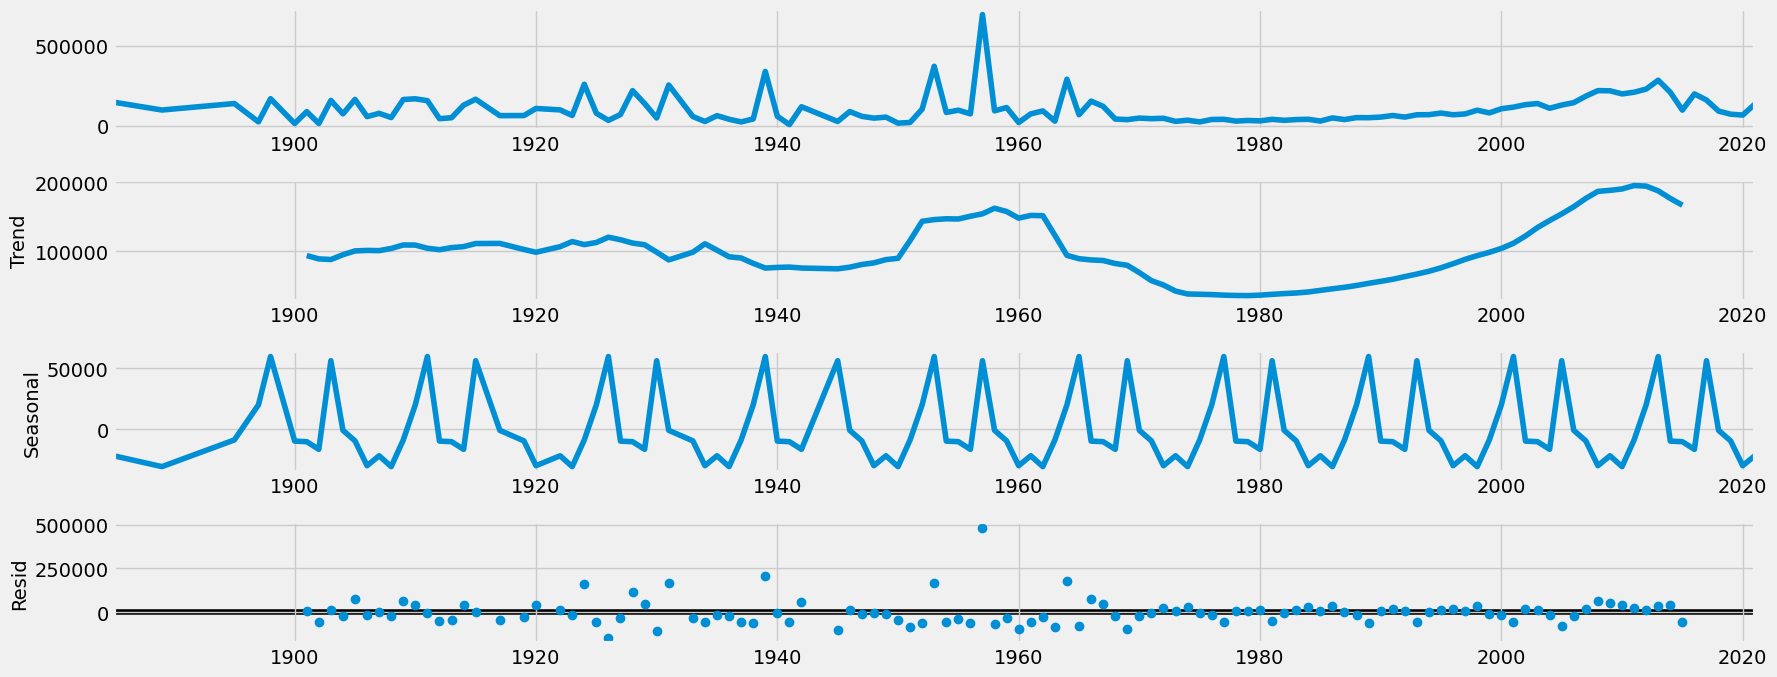

In [14]:
decomposition.plot()
plt.show()

#### Here as we can notice in the trend, we can notice that prices of boats on 195-1960 period and the ones built in 2000 in advance show higher prices, the trend is not smooth this is produced because of the noise we can observe in the last graph. Also is visible the seasonality is not usefull because we got only year of production. 

### Conduct a Dickey-Fuller test to check for stationarity.

#####    Interpret the results in a markdown cell and reference your null hypothesis.


In [15]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_year['value_in_eur'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.783676
p-value                          0.060644
Number of Lags Used              7.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


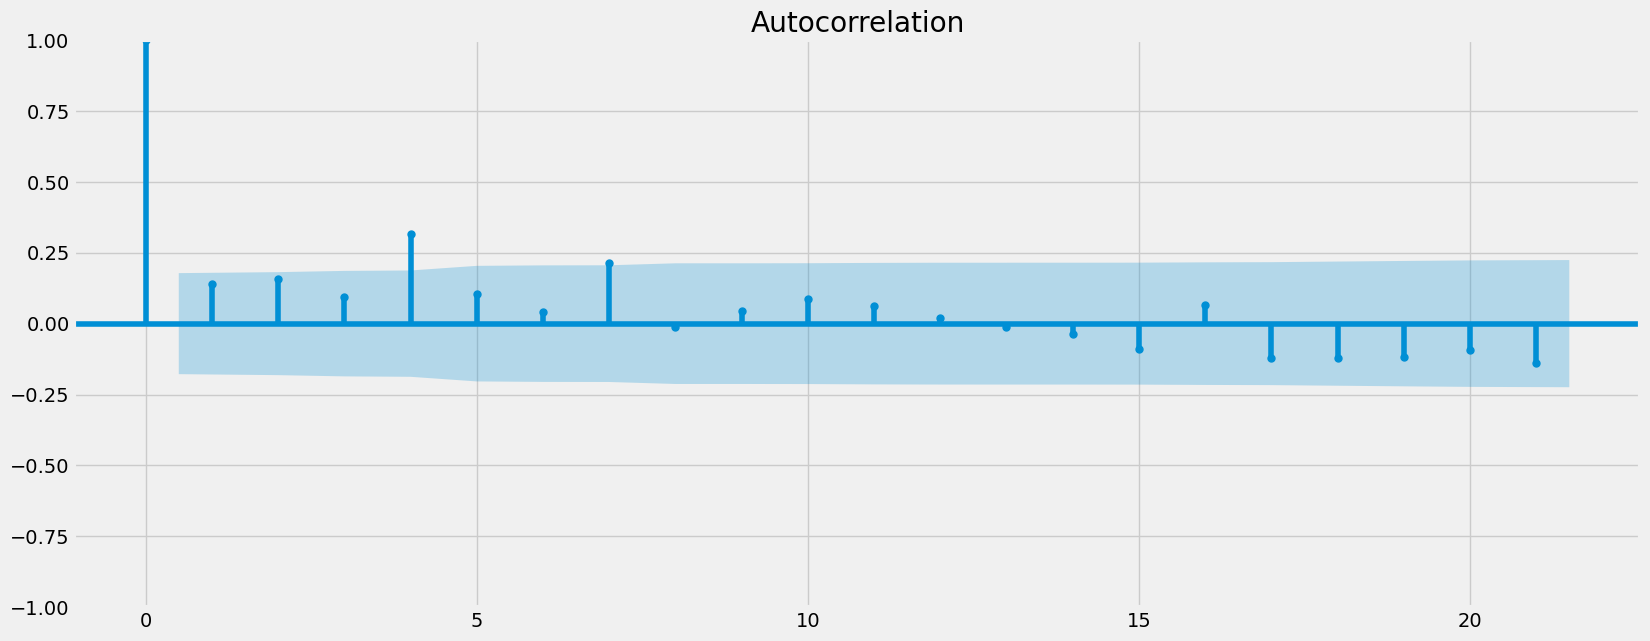

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_year)
plt.show()

### Test Statistic -2.783676>Critical Value (5%)-2.887477can not  reject the null hypothesis
### Data non stationary

Dickey-Fuller Stationarity test:
Test Statistic                -7.486008e+00
p-value                        4.637235e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


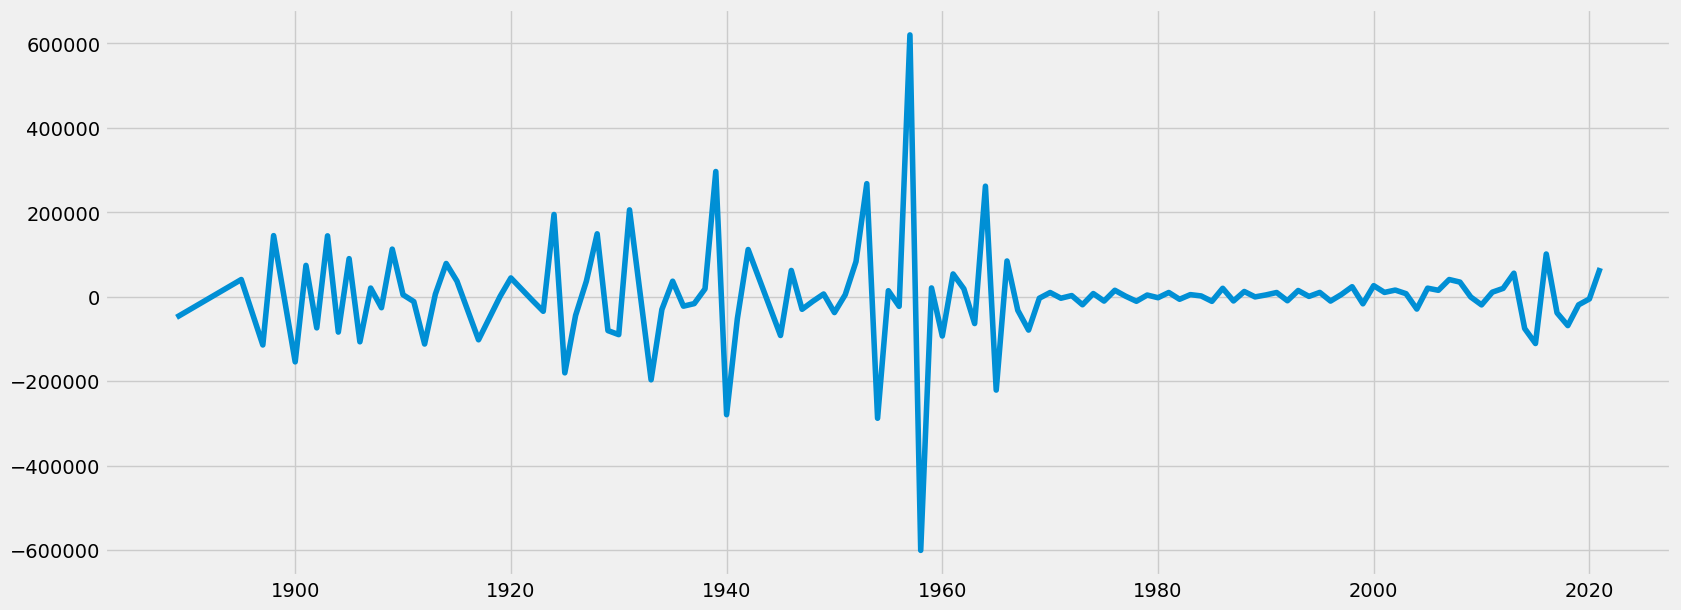

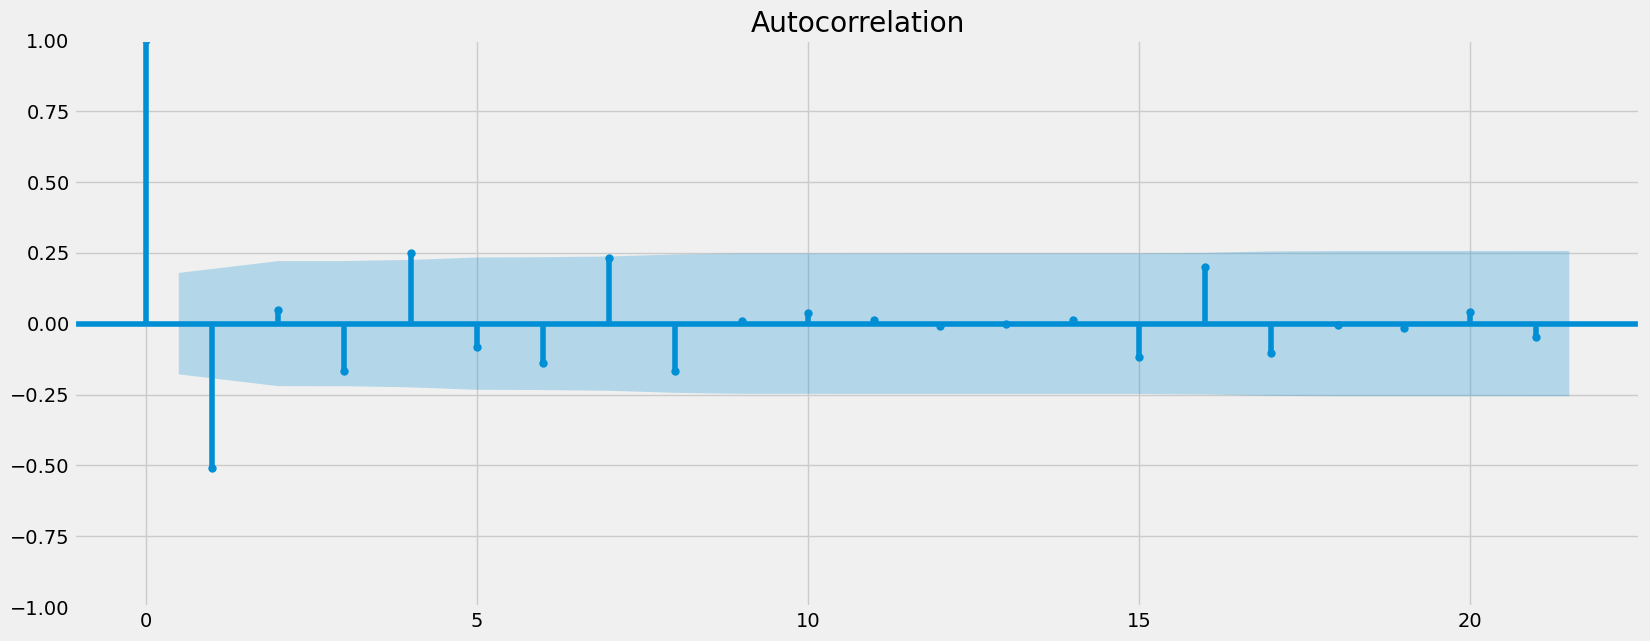

In [17]:
#Differencing data
data_diff = df_year - df_year.shift(1) 
data_diff.dropna(inplace = True) 
plt.figure(figsize=(18,7), dpi=100) 
plt.plot(data_diff) 
dickey_fuller(data_diff) 
plot_acf(data_diff) 
plt.show()

Dickey-Fuller Stationarity test:
Test Statistic                -7.486008e+00
p-value                        4.637235e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


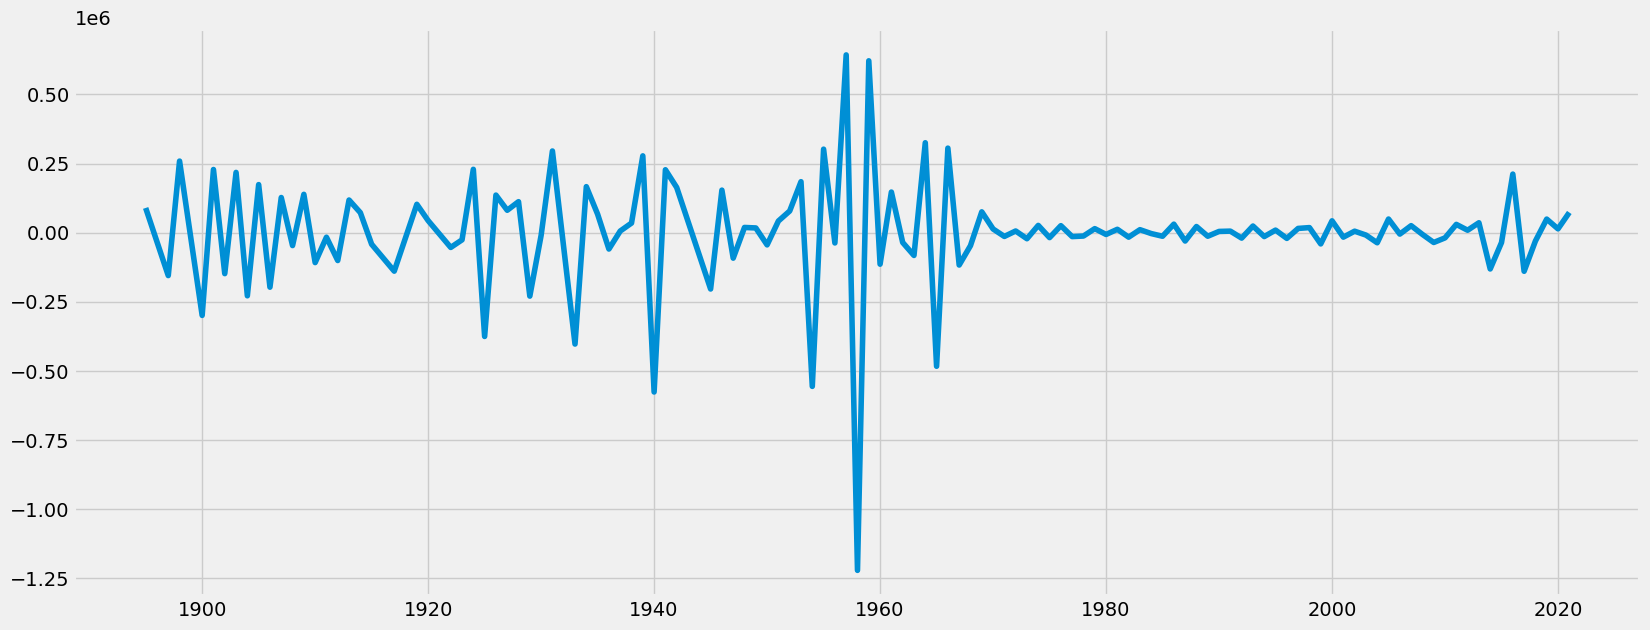

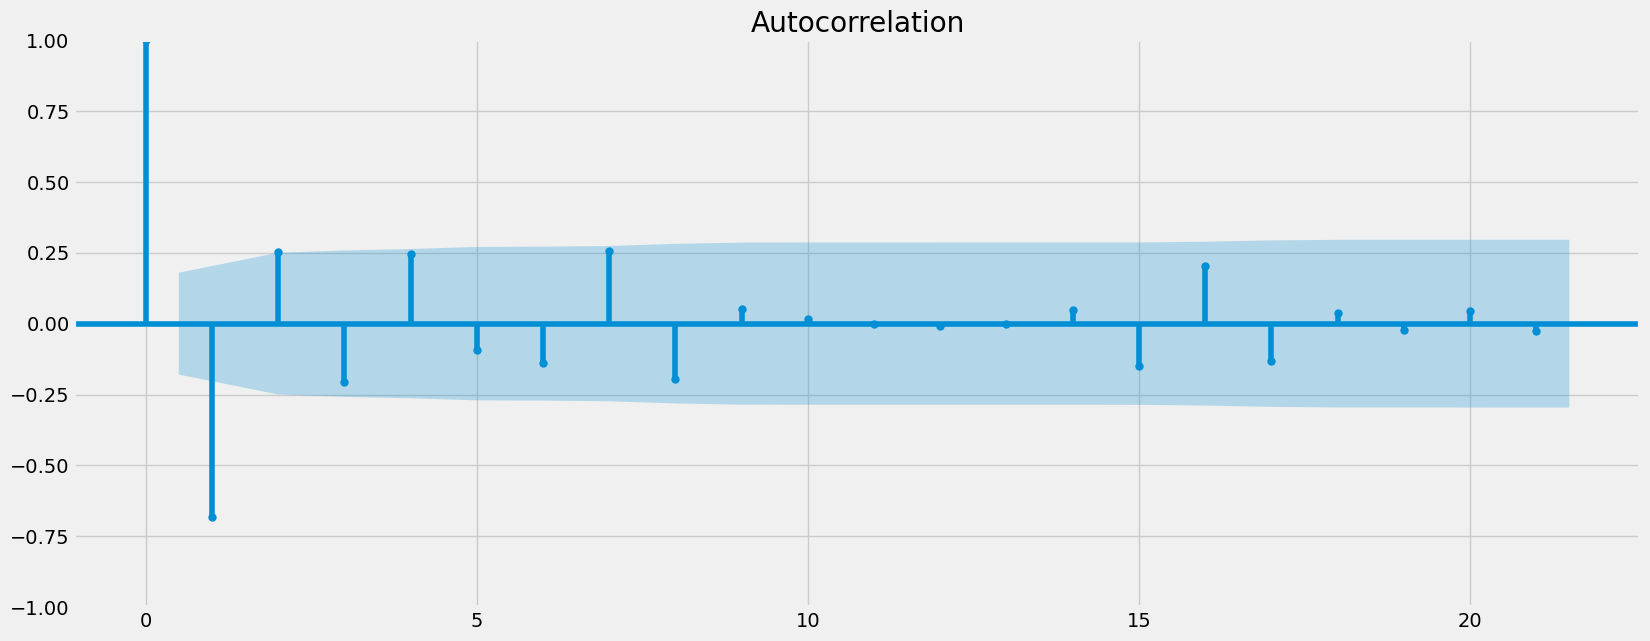

In [18]:
#second round diff
data_diff1 = data_diff - data_diff.shift(1)
data_diff1.dropna(inplace = True) 
plt.figure(figsize=(18,7), dpi=100) 
plt.plot(data_diff1) 
dickey_fuller(data_diff) 
plot_acf(data_diff1) 
plt.show()

In [19]:
df_year.index.freq = 'M'

In [20]:
decomposition = sm.tsa.seasonal_decompose(data_diff1, model='additive', period=12)

In [21]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

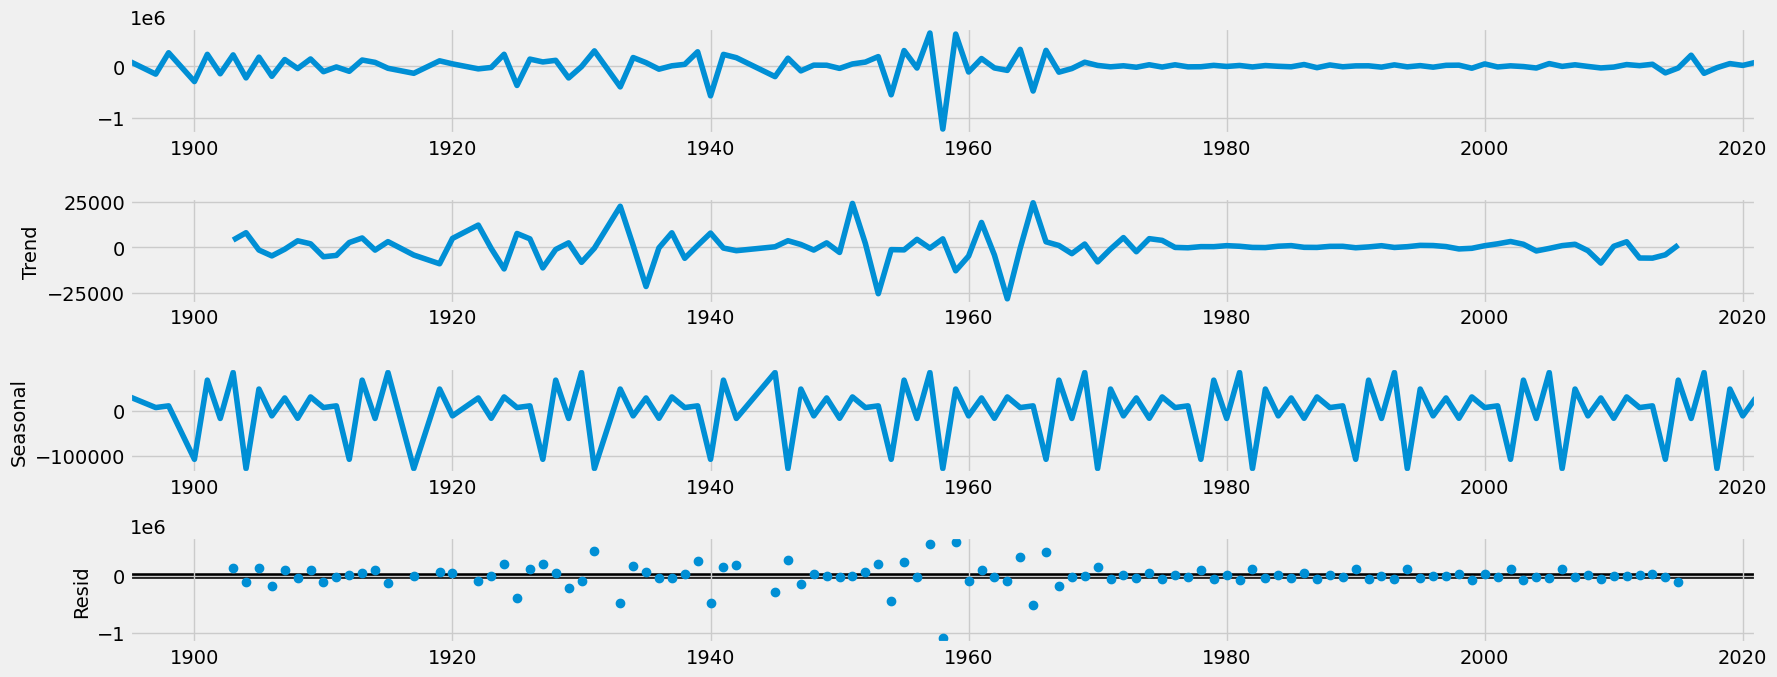

In [22]:
decomposition.plot()
plt.show()

In [23]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff1['value_in_eur'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.702897e+00
p-value                        3.849173e-09
Number of Lags Used            1.100000e+01
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64
